In [22]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
im = Image.open("birthday.png")

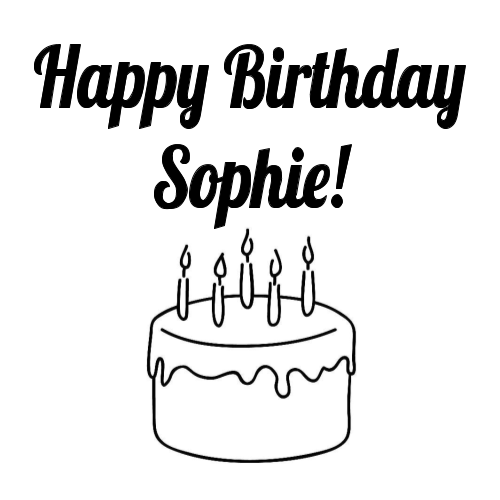

In [23]:
im

In [3]:
(im.format, im.size, im.mode)

('PNG', (500, 500), 'RGBA')

In [9]:
np.array(im).shape

(500, 500, 4)

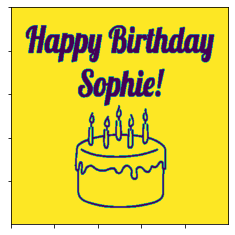

In [132]:
src = np.array(im.convert('L')) > 240
plt.imshow(src)

In [138]:
%%time
src = np.array(im.convert('L')) > 240
dist = np.ones(shape = (500,500)) * 1000
i, j = np.array(np.where(1 - src))[:, ::1000].reshape(2, 1, 1, -1)
I = np.arange(500).reshape(-1,1,1)
J = np.arange(500).reshape(1,-1,1)

for i,j in pixels:
    d = np.sqrt((I - i)**2 + (J - j)**2)
    dist = np.minimum(dist, d)

KeyboardInterrupt: 

In [145]:
%%time
pixels = np.array(np.where(1 - src))
I = np.arange(500).reshape(-1,1,1)
J = np.arange(500).reshape(1,-1,1)

dist = np.ones((500,500)) * 1000
for k in range(10):
    print(k)
    i, j = pixels[:, k::10].reshape(2, 1, 1, -1)
    dist = np.minimum(dist, np.min(np.sqrt((I - i)**2 + (J - j)**2), axis = -1))

0
1
2
3
4
5
6
7
8
9
CPU times: user 1min 8s, sys: 3min 11s, total: 4min 20s
Wall time: 8min 35s


In [129]:
%%time
pixels = np.array(np.where(1 - src))[:, :]
I = np.arange(500).reshape(-1,1,1)
J = np.arange(500).reshape(1,-1,1)

groups = 50

def compute(k):
    i, j = pixels[:, k::groups].reshape(2, 1, 1, -1)
    dist = np.min(np.sqrt((I - i)**2 + (J - j)**2), axis = -1, initial = 1000)
    return dist

dist = np.min([compute(k) for k in range(groups)], axis = 0)

KeyboardInterrupt: 

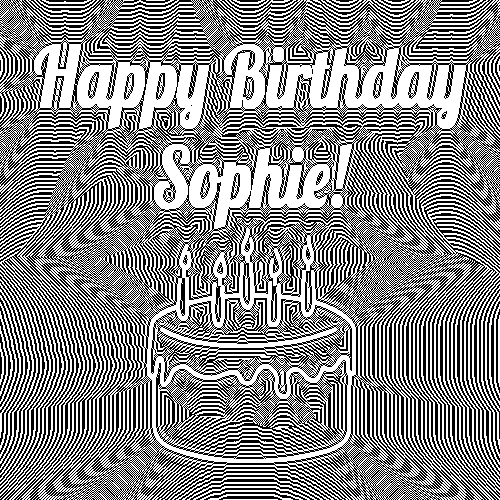

In [154]:
quantised = 255 - (dist / np.max(dist) * 255).astype(np.uint8)
#quantised = (quantised % 2) * 255
im2 = Image.fromarray(quantised, mode = 'L')
im2 = im2.convert("RGBA")
im2.save('distfield.png')
im2

Help on ufunc object:

log = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  **Calling ufuncs:** ``op(*x[, out], where=True, **kwargs)``
 |  
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array object(s) in whic